In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("AirQualityUCI.csv", sep=";", decimal=',')

In [3]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


In [4]:
df.drop(['Unnamed: 15', 'Unnamed: 16'],axis=1, inplace=True)

In [5]:
df.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,-34.207524,1048.990061,-159.090093,1.865683,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,9.778305,39.485380,-6.837604
std,77.657170,329.832710,139.789093,41.380206,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,43.203623,51.216145,38.976670
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,0.600000,921.000000,-200.000000,4.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,10.900000,34.100000,0.692300
50%,1.500000,1053.000000,-200.000000,7.900000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,17.200000,48.600000,0.976800
75%,2.600000,1221.000000,-200.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000


In [6]:
df.isnull().sum()

Date             114
Time             114
CO(GT)           114
PT08.S1(CO)      114
NMHC(GT)         114
C6H6(GT)         114
PT08.S2(NMHC)    114
NOx(GT)          114
PT08.S3(NOx)     114
NO2(GT)          114
PT08.S4(NO2)     114
PT08.S5(O3)      114
T                114
RH               114
AH               114
dtype: int64

In [7]:
df.tail(2)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9470,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.shape

(9471, 15)

In [9]:
# My real Instances is 9358 but here i got 9471 instances which are auto generated dummies 
# So we need to remove these NaN values
df.dropna(inplace=True, axis=0)

In [10]:
df.shape

(9357, 15)

In [11]:
df['NMHC(GT)'].value_counts()

NMHC(GT)
-200.0    8443
 66.0       14
 40.0        9
 29.0        9
 88.0        8
          ... 
 422.0       1
 424.0       1
 339.0       1
 445.0       1
 307.0       1
Name: count, Length: 430, dtype: int64

In [12]:
df.isin([-200]).sum(axis=0)

Date                0
Time                0
CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64

In [13]:
# We need to replace -200 values to NaN because -200 is like missing values
df = df.replace(to_replace=-200, value=np.NaN)

In [14]:
df.isnull().sum()

Date                0
Time                0
CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64

In [15]:
df1 = df.iloc[:,0:2]

In [16]:
# Now we replace NaN values with mean of column
df2 = df.iloc[:, 2:]
df2 = df2.fillna(df2.mean())

In [17]:
df = pd.concat([df1, df2], axis=1)
df.tail()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9352,04/04/2005,10.00.00,3.1,1314.0,218.811816,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
9353,04/04/2005,11.00.00,2.4,1163.0,218.811816,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
9354,04/04/2005,12.00.00,2.4,1142.0,218.811816,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406
9355,04/04/2005,13.00.00,2.1,1003.0,218.811816,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139
9356,04/04/2005,14.00.00,2.2,1071.0,218.811816,11.9,1047.0,265.0,654.0,168.0,1129.0,816.0,28.5,13.1,0.5028


In [18]:
df.isnull().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [19]:
date_info = pd.to_datetime(df['Date'], format='mixed')

In [20]:
time_info = df['Time']
time_info = time_info.apply(lambda x:x.replace('.', ':'))

In [21]:
date_time = pd.concat([date_info, time_info], axis=1)

In [22]:
date_time['ds'] = date_time['Date'].astype(str)+' '+date_time['Time'].astype(str)

In [23]:
date_time.head()

,Date,Time,ds
0,2004-10-03,18:00:00,2004-10-03 18:00:00
1,2004-10-03,19:00:00,2004-10-03 19:00:00
2,2004-10-03,20:00:00,2004-10-03 20:00:00
3,2004-10-03,21:00:00,2004-10-03 21:00:00
4,2004-10-03,22:00:00,2004-10-03 22:00:00


In [25]:
data = pd.DataFrame()

In [26]:
data['ds'] = pd.to_datetime(date_time['ds'])

In [28]:
data['y'] = df['RH']
data.head()

,ds,y
0,2004-10-03 18:00:00,48.9
1,2004-10-03 19:00:00,47.7
2,2004-10-03 20:00:00,54.0
3,2004-10-03 21:00:00,60.0
4,2004-10-03 22:00:00,59.6


In [32]:
data.shape

(9357, 2)

In [29]:
from prophet import Prophet

In [30]:
model = Prophet()
model.fit(data)

02:08:27 - cmdstanpy - INFO - Chain [1] start processing
02:08:34 - cmdstanpy - INFO - Chain [1] done processing


In [31]:
future = model.make_future_dataframe(periods=365, freq='H')
future.tail()

,ds
9717,2005-12-19 00:00:00
9718,2005-12-19 01:00:00
9719,2005-12-19 02:00:00
9720,2005-12-19 03:00:00
9721,2005-12-19 04:00:00


In [33]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
9717,2005-12-19 00:00:00,59.503285,42.214584,77.283455
9718,2005-12-19 01:00:00,60.882580,43.958052,80.033642
9719,2005-12-19 02:00:00,61.961403,46.417064,79.598606
9720,2005-12-19 03:00:00,62.749847,44.416519,80.430336
9721,2005-12-19 04:00:00,63.533988,46.690565,81.235579


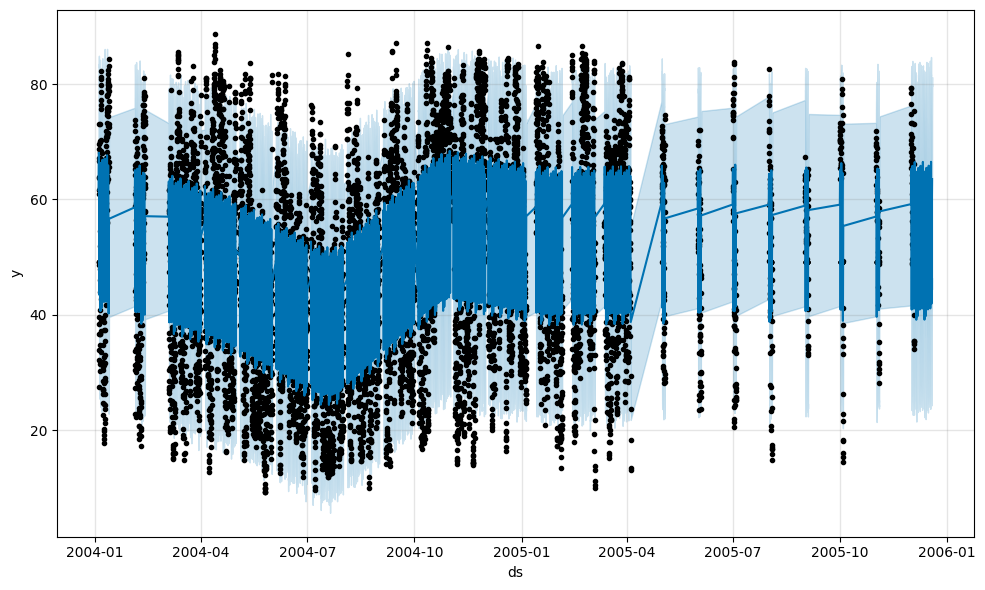

In [34]:
fig1 = model.plot(forecast)

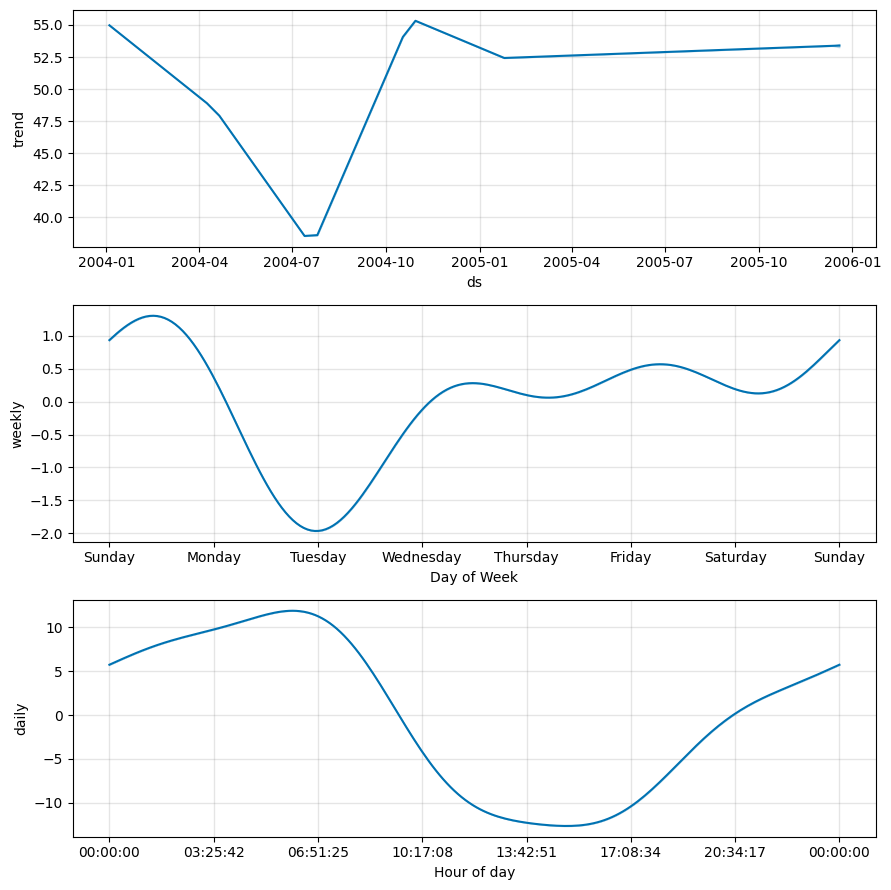

In [35]:
fig2 = model.plot_components(forecast)